#**Import Libraries**
* **random** - for random number generation
* **numpy** - for array operations
* **matplotlib.pyplot** - for plotting graphs



In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
Gen = np.array([])
Fit = np.array([])

# **Graph Creation**
Create a graph to be colored

In [ ]:
# n - number of vertices
n = 40
# We represent the graph by its adjacency matrix
graph = []
for i in range(n):
    vertex = []
    for j in range(n):
        vertex.append(random.randint(0, 1))
    graph.append(vertex)

# Since this is a simple graph, the adjacency matrix must be symmetric
for i in range(n):
    for j in range(0, i):
        graph[i][j] = graph[j][i]
for i in range(n):
    graph[i][i] = 0

#for v in graph:
#   print(v)

Dense/Sparse Graphs

In [ ]:
# n - number of vertices
n = 40
# We represent the graph by its adjacency matrix
graph = []
for i in range(n):
    vertex = []
    for j in range(n):
        threshold = 0.8
        if (random.uniform(0, 1) < threshold):
            vertex.append(1)
        else:
            vertex.append(0)
    graph.append(vertex)

# Since this is a simple graph, the adjacency matrix must be symmetric
for i in range(n):
    for j in range(0, i):
        graph[i][j] = graph[j][i]
for i in range(n):
    graph[i][i] = 0

#for v in graph:
#   print(v)

In [ ]:
vtx_degree = []
for i in range(n):
    degree = 0
    for j in range(n):
        degree += graph[i][j]
    vtx_degree.append(degree)
# print(vtx_degree)
max_vtx_degree = max(vtx_degree)
print("Maximum vertex degree :", max_vtx_degree)

Maximum vertex degree : 37


In [ ]:
'''Upper Bound for Coloring'''
max_num_colors = max_vtx_degree + 1
print("Maximum number of colors needed :", max_num_colors)

Maximum number of colors needed : 38


In [ ]:
def createIndividual(n, number_of_colors):
    individual = []
    for i in range(n):
        individual.append(random.randint(1, number_of_colors))
    return individual

def evalFunc(graph, individual):
    conflict = 0
    n = len(graph)
    for i in range(n):
        for j in range(i, n):
            if (graph[i][j] == 1 and individual[i] == individual[j]):
                conflict += 1
    return conflict

In [ ]:
def mutation(individual, number_of_colors):
    n = len(individual)
    probability = 0.3
    check = random.uniform(0, 1)
    if (check <= probability):
        position = random.randint(0, n - 1)
        individual[position] = random.randint(1, number_of_colors)
    return individual

def mutatePopulation(population, number_of_colors, gen):
    for individual in population:
        individual = mutation(individual, number_of_colors)
    return population

In [ ]:
def crossover(parent_1, parent_2):
    assert len(parent_1) == len(parent_2)
    n = len(parent_1)
    child_1 = []
    child_2 = []
    position = random.randint(1, n - 2)
    for i in range(position + 1):
        child_1.append(parent_1[i])
        child_2.append(parent_2[i])
    for i in range(position + 1, n):
        child_1.append(parent_2[i])
        child_2.append(parent_1[i])
    assert len(child_1) == len(parent_1)
    assert len(child_2) == len(parent_2)
    return child_1, child_2

def crossoverPopulation(population):
    new_population = []
    random.shuffle(population)
    N = len(population)
    for i in range(0, N - 1, 2):
        child_1, child_2 = crossover(population[i], population[i + 1])
        new_population.append(child_1)
        new_population.append(child_2)
    assert len(new_population) == len(population)
    return new_population

In [ ]:
def tournamentSelection(population, graph):
    new_population = []
    N = len(population)
    for i in range(2):
        random.shuffle(population)
        for i in range(0, N - 1, 2):
            if (evalFunc(graph, population[i])
                < evalFunc(graph, population[i + 1])):
                new_population.append(population[i])
            else:
                new_population.append(population[i + 1])
    assert len(new_population) == N
    return new_population

def rouletteWheelSelection(population, graph):
    total_conflict = 0
    N = len(population)
    for individual in population:
        total_conflict += evalFunc(graph, individual)
    cumulative_conflict = []
    cumulative_conflict_sum = 0
    for individual in population:
        cumulative_conflict_sum += 1/(1 + evalFunc(graph, individual))
        cumulative_conflict.append(cumulative_conflict_sum)
    new_population = []
    for i in range(N):
        roulette = random.uniform(0, cumulative_conflict_sum)
        for j in range(N):
            if (roulette <= cumulative_conflict[j]):
                new_population.append(population[j])
                break
    assert len(new_population) == N
    return new_population

In [ ]:
def geneticAlgorithmForGraphColoring(graph, num_colors, to_print = False,
                                     stop_gen = 1000):
    Gen = []
    Fit = []

    population_size = 200
    generation = 0
    population = []
    n = len(graph)

    for i in range(population_size):
        individual = createIndividual(n, num_colors)
        population.append(individual)
    
    assert len(population) == population_size
    
    # least_conflict = evalFunc(graph, population[0])
    # best_individual = population[0]
    gen = 0
    least_conflict = 1
    first_gen_conflict = 1

    # GA to color graph with 'num_colors' colors
    while (least_conflict != 0 and gen != stop_gen):
        gen += 1
        new_population = tournamentSelection(population, graph)
        #print(new_population)
        new_population = crossoverPopulation(new_population)
        #print(new_population)
        new_population = mutatePopulation(new_population, 
                                          num_colors, gen)
        #print(new_population)
        population = new_population
        least_conflict = evalFunc(graph, population[0])
        best_individual = population[0]
        for individual in population:
            if (evalFunc(graph, individual) < least_conflict):
                least_conflict = evalFunc(graph, individual)
                best_individual = individual

        if gen % 10 == 0 and to_print:
            print("Generation :", gen, "\tBest fitness :", least_conflict,
                "\tIndividual :", best_individual)
        Gen = np.append(Gen, gen)
        Fit = np.append(Fit, least_conflict)

        if gen == 1:
            first_gen_conflict = least_conflict
        
        if gen == 50:
            if least_conflict > 0.9 * first_gen_conflict:
                break

    print("\nUsing", num_colors, " colors :")
    print("Generation :", gen, " Best fitness :", least_conflict,
          " Individual :", best_individual)
    #print("Gen :", Gen)
    #print("Fit :", Fit)
    #condition = False

    if to_print:
        # Print fitness graph
        plt.plot(Gen, Fit)
        plt.xlabel("generation")
        plt.ylabel("least-conflict")
        plt.show()
        print("\n\n")

    if least_conflict != 0:
        return False
    return True

# **Linear Search**

Generation : 10 	Best fitness : 6 	Individual : [10, 23, 3, 18, 4, 12, 20, 4, 3, 36, 38, 1, 13, 28, 14, 22, 18, 34, 5, 25, 7, 5, 25, 14, 17, 12, 19, 6, 29, 24, 31, 21, 35, 23, 33, 8, 26, 9, 2, 20]
Generation : 20 	Best fitness : 4 	Individual : [6, 28, 13, 21, 15, 33, 18, 7, 14, 12, 5, 28, 4, 24, 23, 10, 35, 3, 22, 30, 25, 26, 20, 25, 34, 19, 16, 14, 2, 6, 29, 16, 1, 32, 11, 1, 13, 30, 36, 7]
Generation : 30 	Best fitness : 3 	Individual : [4, 6, 10, 24, 29, 33, 18, 14, 3, 25, 36, 19, 28, 37, 21, 8, 9, 23, 37, 30, 6, 37, 11, 31, 34, 33, 16, 35, 11, 34, 19, 15, 1, 32, 11, 7, 13, 30, 36, 7]

Using 38  colors :
Generation : 39  Best fitness : 0  Individual : [10, 6, 26, 24, 29, 33, 8, 37, 14, 12, 38, 28, 4, 24, 23, 10, 35, 3, 22, 30, 25, 26, 11, 31, 34, 33, 16, 2, 17, 6, 13, 16, 1, 32, 14, 15, 13, 30, 38, 21]


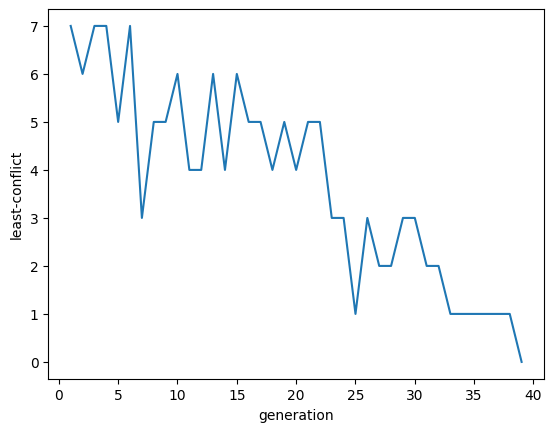




Generation : 10 	Best fitness : 5 	Individual : [24, 1, 11, 15, 10, 6, 24, 2, 4, 5, 21, 34, 37, 34, 30, 28, 11, 26, 3, 29, 19, 31, 18, 12, 7, 2, 35, 20, 18, 32, 17, 30, 25, 14, 13, 35, 4, 33, 31, 8]
Generation : 20 	Best fitness : 2 	Individual : [24, 1, 11, 19, 22, 4, 14, 12, 13, 31, 2, 21, 14, 8, 15, 17, 3, 26, 3, 29, 19, 31, 18, 12, 7, 2, 35, 20, 18, 27, 37, 30, 25, 10, 13, 34, 11, 33, 23, 5]
Generation : 30 	Best fitness : 1 	Individual : [24, 1, 11, 19, 22, 4, 14, 12, 13, 32, 2, 21, 14, 34, 15, 17, 3, 26, 3, 29, 19, 15, 16, 36, 7, 30, 5, 20, 18, 27, 37, 25, 10, 13, 9, 35, 4, 33, 31, 27]

Using 37  colors :
Generation : 32  Best fitness : 0  Individual : [22, 31, 33, 1, 1, 4, 14, 12, 6, 32, 2, 21, 14, 8, 15, 17, 3, 26, 3, 29, 19, 31, 17, 12, 7, 21, 35, 20, 18, 27, 2, 25, 28, 9, 6, 37, 6, 33, 36, 27]


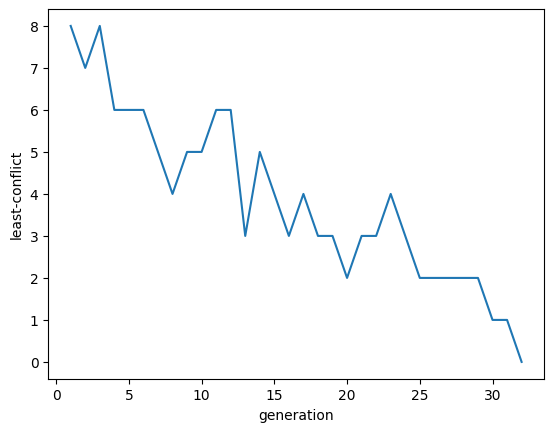

KeyboardInterrupt: ignored

In [ ]:
number_of_colors = max_num_colors
condition = True
# Linear Search
linear_start = time.time()
while (condition and number_of_colors):
    if geneticAlgorithmForGraphColoring(graph, number_of_colors,
                                        to_print = True):
        number_of_colors -= 1
    else:
        print("Graph is", number_of_colors + 1, " colorable!")
        condition = False
linear_end = time.time()

print("Linear time:", linear_end - linear_start, " seconds")

# **Logarithmic Search**

Generation : 10 	Best fitness : 19 	Individual : [5, 1, 19, 18, 16, 2, 11, 4, 9, 4, 9, 11, 18, 12, 10, 14, 18, 15, 8, 11, 16, 19, 15, 3, 17, 8, 4, 16, 2, 13, 6, 14, 10, 5, 2, 17, 15, 16, 7, 13]
Generation : 20 	Best fitness : 16 	Individual : [9, 15, 11, 17, 8, 12, 4, 6, 2, 19, 12, 12, 15, 8, 13, 12, 13, 5, 5, 1, 9, 10, 18, 4, 11, 16, 10, 5, 19, 18, 13, 3, 16, 2, 2, 19, 8, 6, 17, 3]
Generation : 30 	Best fitness : 14 	Individual : [13, 6, 10, 11, 2, 10, 13, 3, 16, 15, 19, 18, 3, 9, 2, 16, 14, 1, 1, 8, 12, 5, 18, 4, 11, 16, 11, 17, 19, 19, 6, 3, 5, 14, 7, 5, 15, 12, 12, 6]
Generation : 40 	Best fitness : 10 	Individual : [6, 3, 7, 11, 8, 12, 19, 4, 16, 15, 19, 18, 3, 9, 1, 2, 13, 5, 18, 4, 9, 10, 18, 4, 11, 16, 10, 12, 13, 12, 6, 3, 5, 14, 2, 17, 15, 12, 17, 14]
Generation : 50 	Best fitness : 7 	Individual : [8, 6, 10, 11, 15, 12, 7, 3, 16, 15, 19, 18, 3, 15, 1, 2, 13, 5, 13, 18, 17, 10, 18, 4, 11, 16, 1, 12, 9, 12, 6, 3, 5, 14, 2, 19, 15, 12, 17, 3]
Generation : 60 	Best fitness : 5 	

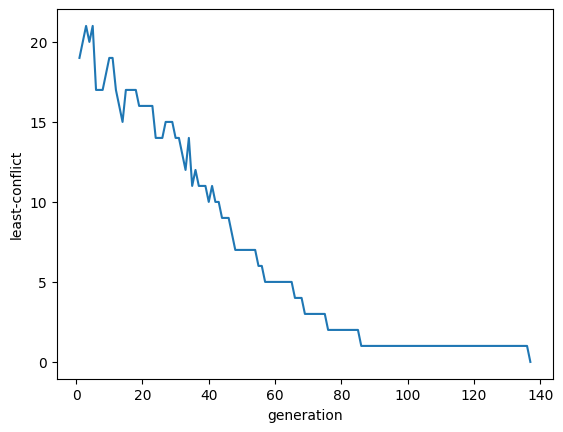




9
Generation : 10 	Best fitness : 44 	Individual : [6, 7, 7, 3, 9, 5, 8, 5, 10, 2, 2, 2, 9, 3, 8, 6, 10, 4, 7, 3, 10, 8, 10, 5, 3, 2, 3, 4, 8, 1, 6, 1, 9, 1, 6, 7, 5, 6, 5, 8]
Generation : 20 	Best fitness : 34 	Individual : [8, 8, 7, 2, 2, 5, 7, 8, 10, 6, 9, 9, 1, 6, 10, 4, 10, 10, 10, 3, 1, 7, 9, 1, 5, 3, 4, 4, 5, 6, 5, 1, 7, 6, 4, 3, 8, 5, 9, 2]
Generation : 30 	Best fitness : 32 	Individual : [2, 2, 2, 1, 2, 5, 7, 8, 10, 6, 9, 9, 1, 6, 10, 4, 10, 10, 10, 6, 8, 7, 8, 5, 3, 3, 7, 5, 5, 2, 9, 1, 7, 3, 4, 3, 8, 5, 9, 4]
Generation : 40 	Best fitness : 26 	Individual : [8, 8, 7, 2, 2, 5, 7, 1, 2, 6, 9, 9, 1, 6, 10, 4, 10, 10, 10, 3, 1, 7, 9, 6, 4, 3, 7, 5, 5, 5, 9, 1, 7, 6, 4, 3, 8, 5, 9, 2]
Generation : 50 	Best fitness : 23 	Individual : [6, 7, 4, 3, 2, 5, 7, 1, 6, 6, 9, 9, 1, 8, 10, 4, 10, 10, 10, 1, 1, 7, 9, 8, 3, 3, 7, 5, 5, 6, 9, 1, 7, 6, 4, 3, 8, 5, 9, 2]
Generation : 60 	Best fitness : 21 	Individual : [8, 8, 4, 2, 2, 5, 7, 1, 2, 6, 9, 9, 1, 3, 10, 4, 10, 10, 10, 3, 1, 7, 9, 

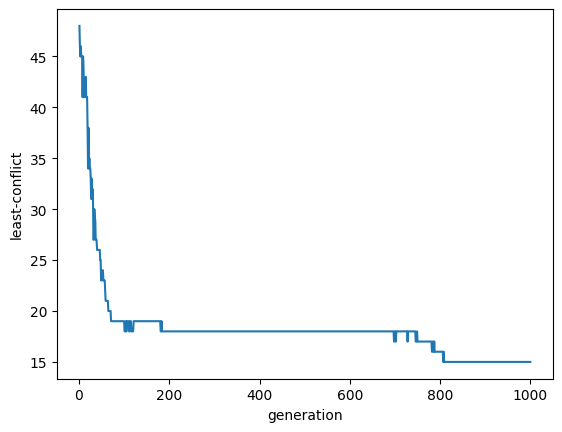




4
Generation : 10 	Best fitness : 24 	Individual : [12, 3, 10, 14, 8, 13, 11, 10, 9, 2, 14, 6, 8, 3, 1, 12, 7, 11, 5, 2, 13, 1, 9, 3, 14, 2, 3, 5, 6, 10, 7, 9, 15, 12, 5, 6, 3, 15, 13, 4]
Generation : 20 	Best fitness : 22 	Individual : [2, 6, 15, 9, 7, 8, 2, 3, 1, 15, 9, 8, 4, 15, 1, 12, 7, 11, 5, 15, 4, 1, 9, 3, 10, 9, 10, 3, 5, 1, 11, 13, 8, 14, 13, 12, 10, 6, 3, 14]
Generation : 30 	Best fitness : 18 	Individual : [15, 1, 5, 6, 2, 13, 9, 11, 7, 8, 14, 3, 5, 12, 1, 12, 7, 14, 9, 4, 15, 6, 14, 3, 2, 7, 10, 3, 5, 1, 11, 13, 8, 12, 2, 6, 11, 12, 14, 10]
Generation : 40 	Best fitness : 16 	Individual : [15, 1, 5, 6, 2, 13, 9, 11, 7, 8, 14, 3, 8, 10, 1, 12, 7, 14, 9, 4, 15, 1, 14, 3, 2, 7, 10, 3, 5, 1, 11, 13, 8, 7, 13, 6, 8, 15, 9, 10]
Generation : 50 	Best fitness : 12 	Individual : [15, 1, 5, 6, 2, 3, 9, 10, 7, 15, 14, 3, 4, 12, 2, 13, 12, 14, 9, 4, 4, 8, 14, 3, 2, 12, 10, 3, 5, 1, 11, 13, 8, 2, 13, 6, 12, 10, 10, 7]
Generation : 60 	Best fitness : 8 	Individual : [15, 1, 5, 6, 7, 

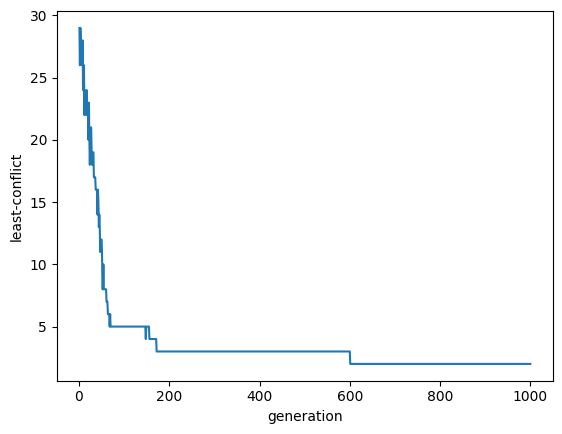




2
Generation : 10 	Best fitness : 18 	Individual : [5, 6, 7, 4, 8, 8, 3, 16, 4, 9, 11, 1, 17, 9, 10, 7, 1, 13, 3, 17, 17, 17, 11, 16, 4, 15, 6, 14, 13, 14, 5, 7, 1, 2, 3, 10, 16, 6, 11, 12]
Generation : 20 	Best fitness : 19 	Individual : [5, 6, 7, 2, 3, 4, 17, 10, 10, 3, 8, 6, 11, 12, 12, 2, 8, 15, 9, 1, 4, 16, 15, 15, 10, 8, 16, 14, 13, 14, 5, 12, 8, 3, 13, 10, 9, 14, 2, 7]
Generation : 30 	Best fitness : 14 	Individual : [6, 15, 16, 12, 5, 8, 7, 16, 14, 1, 8, 7, 5, 7, 9, 3, 12, 9, 12, 10, 17, 11, 2, 16, 4, 13, 4, 14, 11, 14, 2, 15, 13, 3, 13, 10, 9, 14, 8, 12]
Generation : 40 	Best fitness : 13 	Individual : [5, 6, 16, 4, 12, 8, 16, 1, 14, 9, 13, 8, 3, 8, 10, 7, 4, 13, 3, 17, 17, 17, 11, 16, 4, 15, 6, 14, 13, 14, 5, 6, 1, 2, 15, 9, 2, 14, 8, 12]
Generation : 50 	Best fitness : 9 	Individual : [6, 5, 16, 4, 5, 8, 7, 16, 6, 3, 8, 1, 3, 4, 10, 7, 10, 13, 9, 17, 17, 17, 11, 16, 4, 11, 1, 14, 13, 14, 5, 15, 1, 2, 15, 9, 2, 14, 8, 12]
Generation : 60 	Best fitness : 7 	Individual : [6,

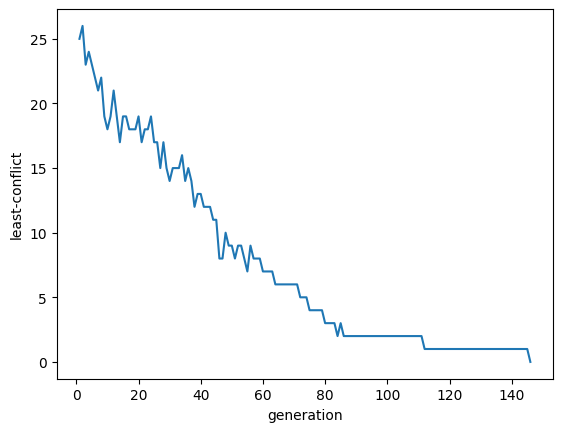




1
Generation : 10 	Best fitness : 23 	Individual : [14, 10, 6, 8, 7, 6, 3, 13, 1, 4, 15, 5, 16, 11, 9, 2, 10, 3, 3, 16, 8, 4, 14, 2, 8, 15, 12, 11, 7, 1, 6, 9, 12, 16, 7, 3, 15, 1, 12, 2]
Generation : 20 	Best fitness : 22 	Individual : [7, 10, 13, 3, 14, 8, 4, 1, 14, 5, 9, 5, 15, 5, 2, 6, 7, 11, 8, 16, 1, 16, 13, 3, 8, 11, 2, 1, 10, 14, 12, 3, 9, 6, 7, 4, 10, 12, 4, 2]
Generation : 30 	Best fitness : 20 	Individual : [5, 6, 13, 10, 14, 8, 4, 1, 10, 4, 15, 15, 16, 11, 9, 2, 10, 3, 3, 11, 7, 6, 12, 3, 13, 12, 5, 2, 9, 6, 2, 9, 12, 16, 9, 14, 13, 15, 8, 10]
Generation : 40 	Best fitness : 16 	Individual : [11, 13, 9, 15, 14, 12, 4, 1, 10, 6, 14, 14, 1, 2, 5, 16, 10, 9, 13, 3, 8, 4, 14, 2, 8, 11, 5, 7, 9, 6, 10, 4, 11, 16, 7, 3, 15, 1, 12, 5]
Generation : 50 	Best fitness : 12 	Individual : [6, 9, 1, 13, 14, 8, 4, 1, 10, 6, 11, 14, 1, 14, 5, 16, 10, 12, 13, 16, 1, 4, 12, 3, 13, 11, 5, 7, 9, 6, 2, 9, 12, 16, 9, 3, 14, 7, 11, 15]
Generation : 60 	Best fitness : 9 	Individual : [6, 9, 1, 

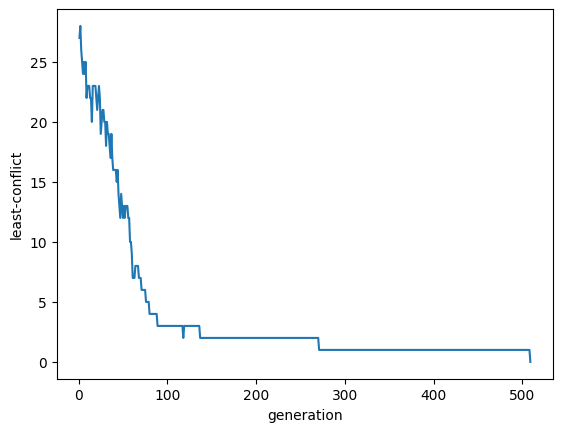




0
Graph is 16 -colorable
Logarithmic time: 198.58278226852417  seconds


In [ ]:
number_of_colors = max_num_colors
condition = True

# Logarithmic Search
logarithmic_start = time.time()
end = max_num_colors
step = (end - 1) // 2

palette_map = [0] * (max_num_colors + 1)
palette_map[1] = 1

while (step):
    while (end - step > 0 and palette_map[end - step] == 0
           and geneticAlgorithmForGraphColoring(graph, end - step, True)):
        end = end - step
    if (end - step > 0):
        palette_map[end - step] = 1
    step = step // 2
    print(step)

logarithmic_end = time.time()

'''
assert geneticAlgorithmForGraphColoring(graph, end)
if end > 1:
    assert geneticAlgorithmForGraphColoring(graph, end - 1) == False
'''
print("Graph is", end, "-colorable")
print("Logarithmic time:", logarithmic_end - logarithmic_start, " seconds")

In [ ]:
def genGraph(n, density):
    # n - number of vertices
    # density - how dense the edges are
    # We represent the graph by its adjacency matrix
    graph = []
    for i in range(n):
        vertex = []
        for j in range(n):
            if (random.uniform(0, 1) < density):
                vertex.append(1)
            else:
                vertex.append(0)
        graph.append(vertex)

    # Since this is a simple graph, the adjacency matrix must be symmetric
    for i in range(n):
        for j in range(0, i):
            graph[i][j] = graph[j][i]
    for i in range(n):
        graph[i][i] = 0
    max_degree = 0
    for i in range(n):
        max_degree = max(sum(graph[i]), max_degree)

    return graph, max_degree

# **Function for Linear Search**

In [ ]:
def linearSearch(n, density):
    graph, max_degree = genGraph(n, density)
    number_of_colors = max_degree + 1
    condition = True
    linear_start = time.time()
    while (condition and number_of_colors):
        if geneticAlgorithmForGraphColoring(graph, number_of_colors):
            number_of_colors -= 1
        else:
            print("Graph is", number_of_colors + 1, " colorable!")
            condition = False
    linear_end = time.time()
    print("Linear time:", linear_end - linear_start, " seconds")
    return linear_end - linear_start

In [ ]:
linear_times = []
vertex_count = []

for v in range(5, 101, 5):
    time_here = linearSearch(v, 0.5)
    linear_times.append(time_here)
    vertex_count.append(v)
    print("Time:", time_here, " Nodes:", v)
print(linear_times)
print(vertex_count)


Using 5  colors :
Generation : 1  Best fitness : 0  Individual : [4, 2, 3, 1, 5]

Using 4  colors :
Generation : 1  Best fitness : 0  Individual : [4, 1, 1, 2, 3]

Using 3  colors :
Generation : 50  Best fitness : 1  Individual : [1, 2, 2, 2, 3]
Graph is 4  colorable!
Linear time: 0.2840447425842285  seconds
Time: 0.2840447425842285  Nodes: 5

Using 7  colors :
Generation : 1  Best fitness : 0  Individual : [6, 7, 4, 1, 3, 2, 4, 2, 1, 5]

Using 6  colors :
Generation : 1  Best fitness : 0  Individual : [5, 6, 1, 4, 2, 1, 3, 4, 2, 5]

Using 5  colors :
Generation : 1  Best fitness : 0  Individual : [4, 2, 3, 1, 2, 4, 5, 1, 4, 2]

Using 4  colors :
Generation : 2  Best fitness : 0  Individual : [2, 2, 3, 1, 4, 3, 4, 3, 1, 2]

Using 3  colors :
Generation : 1000  Best fitness : 1  Individual : [3, 3, 3, 2, 2, 1, 2, 1, 1, 3]
Graph is 4  colorable!
Linear time: 6.575757265090942  seconds
Time: 6.575757265090942  Nodes: 10

Using 10  colors :
Generation : 4  Best fitness : 0  Individual : [

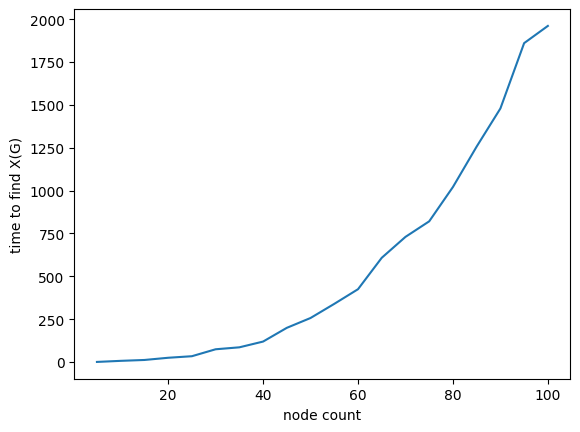

In [ ]:
plt.plot(vertex_count, linear_times)
plt.xlabel("node count")
plt.ylabel("time to find X(G)")
plt.show()
print("\n\n")

# **Function for Logarithmic Search**

In [ ]:
def logarithmicSearch(n, density):
    graph, max_degree = genGraph(n, density)
    max_num_colors = max_degree + 1
    condition = True

    # Logarithmic Search
    logarithmic_start = time.time()
    end = max_num_colors
    step = (end - 1) // 2

    palette_map = [0] * (max_num_colors + 1)
    palette_map[1] = 1

    while (step):
        while (end - step > 0 and palette_map[end - step] == 0
            and geneticAlgorithmForGraphColoring(graph, end - step,
                                                 stop_gen = 300)):
            end = end - step
        if (end - step > 0):
            palette_map[end - step] = 1
        step = step // 2
        #print(step)

    logarithmic_end = time.time()

    '''
    assert geneticAlgorithmForGraphColoring(graph, end)
    if end > 1:
        assert geneticAlgorithmForGraphColoring(graph, end - 1) == False
    '''
    print("Graph is", end, "-colorable")
    print("Logarithmic time:", logarithmic_end - logarithmic_start, " seconds")
    return logarithmic_end - logarithmic_start

In [ ]:
logarithmic_times = []
vertex_count = []

for v in range(5, 101, 5):
    time_here = logarithmicSearch(v, 0.45)
    logarithmic_times.append(time_here)
    vertex_count.append(v)
    print("Time:", time_here, " Nodes:", v)
print(logarithmic_times)
print(vertex_count)


Using 2  colors :
Generation : 1  Best fitness : 0  Individual : [2, 2, 1, 2, 1]
Graph is 2 -colorable
Logarithmic time: 0.01352548599243164  seconds
Time: 0.01352548599243164  Nodes: 5

Using 4  colors :
Generation : 1  Best fitness : 0  Individual : [3, 3, 2, 1, 1, 3, 2, 2, 4, 4]

Using 3  colors :
Generation : 300  Best fitness : 1  Individual : [1, 1, 1, 1, 2, 3, 1, 2, 2, 2]
Graph is 4 -colorable
Logarithmic time: 1.5852465629577637  seconds
Time: 1.5852465629577637  Nodes: 10

Using 6  colors :
Generation : 19  Best fitness : 0  Individual : [1, 2, 6, 6, 3, 2, 3, 6, 5, 3, 2, 2, 5, 6, 4]

Using 2  colors :
Generation : 300  Best fitness : 14  Individual : [1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1]

Using 4  colors :
Generation : 300  Best fitness : 1  Individual : [3, 1, 2, 3, 4, 1, 1, 2, 2, 4, 4, 4, 2, 1, 1]

Using 5  colors :
Generation : 24  Best fitness : 0  Individual : [5, 1, 2, 5, 4, 1, 1, 2, 2, 4, 4, 4, 2, 3, 3]
Graph is 5 -colorable
Logarithmic time: 7.97019624710083  

In [ ]:
number_of_colors = max_num_colors
condition = True

Gen = []
Fit = []

while (condition and number_of_colors):
    population_size = 200
    generation = 0
    population = []

    for i in range(population_size):
        individual = createIndividual(n, number_of_colors)
        population.append(individual)
    
    assert len(population) == population_size
    
    # least_conflict = evalFunc(graph, population[0])
    # best_individual = population[0]
    gen = 0
    least_conflict = 1

    # GA to color graph with 'number_of_colors' colors
    while (least_conflict != 0 and gen != 5000):
        gen += 1
        new_population = tournamentSelection(population, graph)
        #print(new_population)
        new_population = crossoverPopulation(new_population)
        #print(new_population)
        new_population = mutatePopulation(new_population, 
                                          number_of_colors, gen)
        #print(new_population)
        population = new_population
        least_conflict = evalFunc(graph, population[0])
        best_individual = population[0]
        for individual in population:
            if (evalFunc(graph, individual) < least_conflict):
                least_conflict = evalFunc(graph, individual)
                best_individual = individual

        if gen % 10 == 0:
            print("Generation :", gen, "\tBest fitness :", least_conflict,
                "\tIndividual :", best_individual)
        Gen = np.append(Gen, gen)
        Fit = np.append(Fit, least_conflict)

    #print("\nUsing", number_of_colors, " colors :")
    #print("Generation :", gen, " Best fitness :", least_conflict,
          #" Individual :", best_individual, "\n\n")
    #print("Gen :", Gen)
    #print("Fit :", Fit)
    #condition = False
    if (least_conflict != 0):
        condition = False
        #print("This graph is", number_of_colors + 1, " colorable")
    else:
        #Gen = np.append(Gen, gen)
        #Fit = np.append(Fit, least_conflict)
        plt.plot(Gen, Fit)
        plt.xlabel("generation")
        plt.ylabel("best-fitness")
        plt.show()
        Gen = []
        Fit = []
        number_of_colors -= 1
          